### Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing CSV file

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test = pd.read_csv('Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
### Shape of Dataset
df.shape

(8523, 12)

In [5]:
### Columns Name
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
### Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Checking null value count

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

### Filling null values of column 'Outlet_Size' with NaN

In [9]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('NaN')
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df['Item_Weight'].median()

12.6

In [11]:
df['Item_Weight'].mode()

0    12.15
Name: Item_Weight, dtype: float64

In [12]:
df['Item_Weight'].mean()

12.857645184135976

### Filling null values of column 'Item_Weight' with median value

In [13]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Checking duplicate values

In [14]:
df.duplicated().sum()

0

### Dropping duplicate values if it exists

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Columns with unique values and no. of unique values

In [17]:
for col in df.columns:
    if df[col].dtype == "object":
        print(col, df[col].unique(), len(df[col].unique()))

Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 1559
Item_Fat_Content ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] 5
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 16
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 10
Outlet_Size ['Medium' 'NaN' 'High' 'Small'] 4
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2'] 3
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 4


### Dropping 'Item_Identifier' column

In [18]:
df.drop('Item_Identifier',axis=1, inplace=True)

In [19]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Replacing 'reg' with 'Regular' in 'Item_Fat_Content' column

In [20]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF'], dtype=object)

### Replacing 'low fat' and 'LF' with 'Low Fat' in 'Item_Fat_Content' column

In [21]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [22]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


### Creating new column 'Outlet Age' = 2023 - 'Outlet_Establishment_Year'

In [23]:
df['Outlet_Age'] = 2023- df['Outlet_Establishment_Year']
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,25
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


### Dropping 'Outlet_Establishment_Year' column

In [24]:
df.drop('Outlet_Establishment_Year',axis=1, inplace=True)

In [25]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [26]:
import warnings
warnings.filterwarnings("ignore")

### Item Weight Distribution

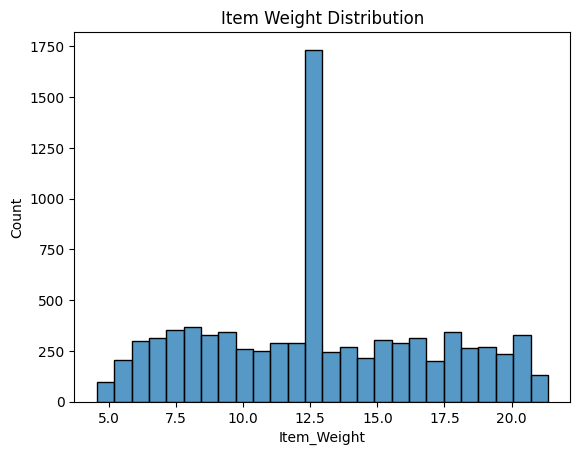

In [27]:
sns.histplot(data=df,x='Item_Weight')
plt.title('Item Weight Distribution')
plt.show()

### Item Fat Content Distribution

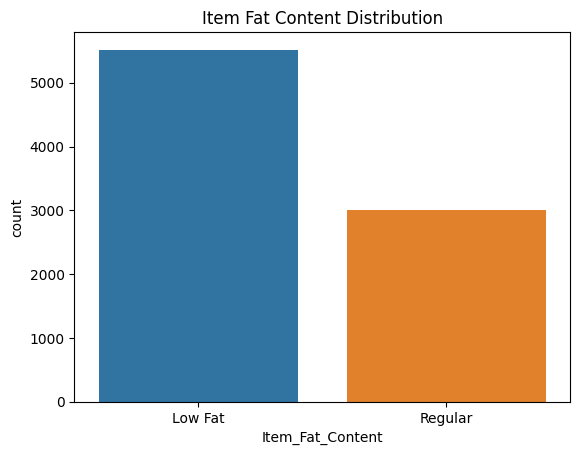

In [28]:
sns.countplot(data=df, x='Item_Fat_Content')
plt.title('Item Fat Content Distribution')
plt.show()

### Item Type Distribution

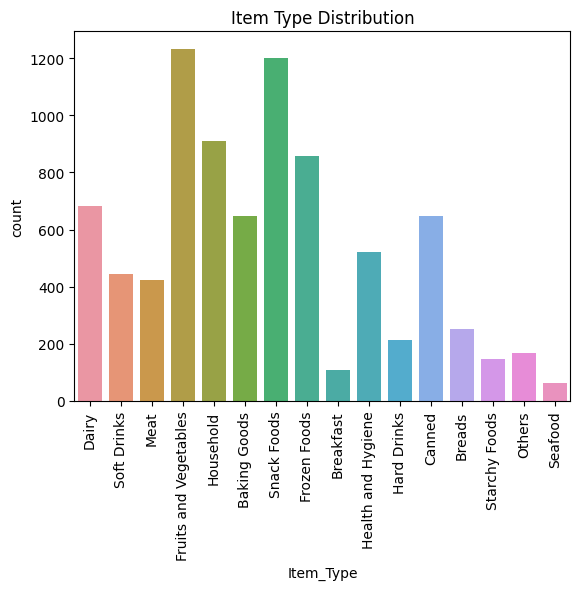

In [29]:
sns.countplot(data=df, x='Item_Type')
plt.title('Item Type Distribution')
plt.xticks(rotation=90)
plt.show()

### Total Outlet Sales by Outlet Identifier

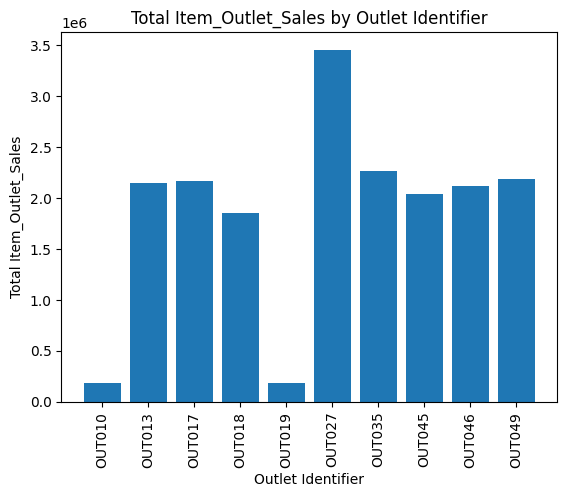

In [30]:
sales_by_outlet = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
plt.bar(sales_by_outlet.index, sales_by_outlet.values)
plt.xlabel('Outlet Identifier')
plt.ylabel('Total Item_Outlet_Sales')
plt.title('Total Item_Outlet_Sales by Outlet Identifier')
plt.xticks(rotation=90)
plt.show()

### Total Outlet Sales by Outlet Size

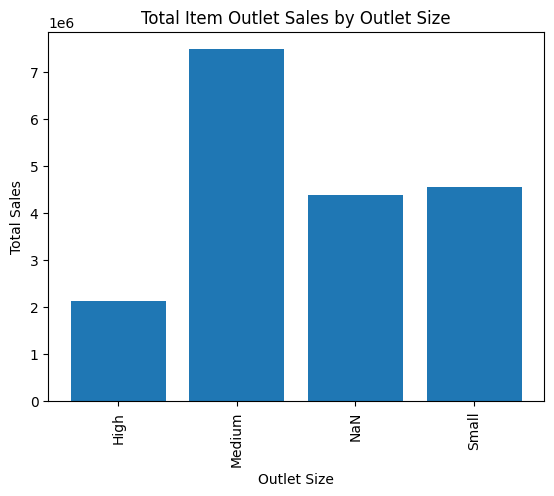

In [31]:
sales_by_outlet_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()
plt.bar(sales_by_outlet_size.index, sales_by_outlet_size.values)
plt.xlabel('Outlet Size')
plt.ylabel('Total Sales')
plt.title('Total Item Outlet Sales by Outlet Size')
plt.xticks(rotation=90)
plt.show()

### Total Outlet Sales by Outlet Location Type

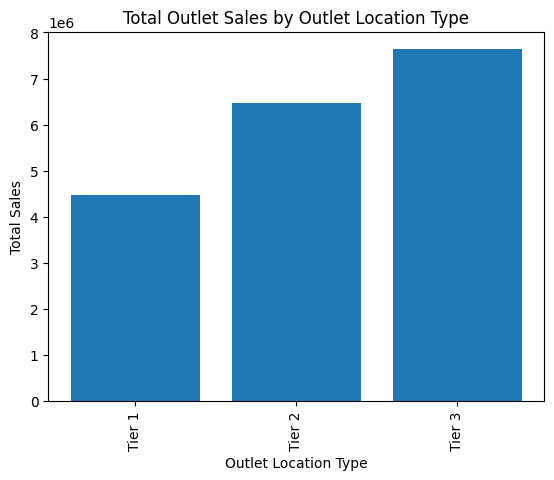

In [32]:
sales_by_outlet_loc_type = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()
plt.bar(sales_by_outlet_loc_type.index, sales_by_outlet_loc_type.values)
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.title('Total Outlet Sales by Outlet Location Type')
plt.xticks(rotation=90)
plt.show()

### Total Outlet Sales by Outlet Type

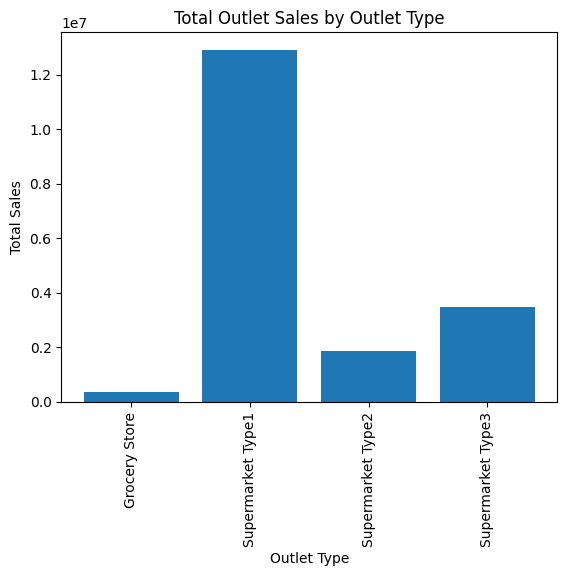

In [33]:
sales_by_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
plt.bar(sales_by_outlet_type.index, sales_by_outlet_type.values)
plt.xlabel('Outlet Type')
plt.ylabel('Total Sales')
plt.title('Total Outlet Sales by Outlet Type')
plt.xticks(rotation=90)
plt.show()

### Box Plot for Item MRP

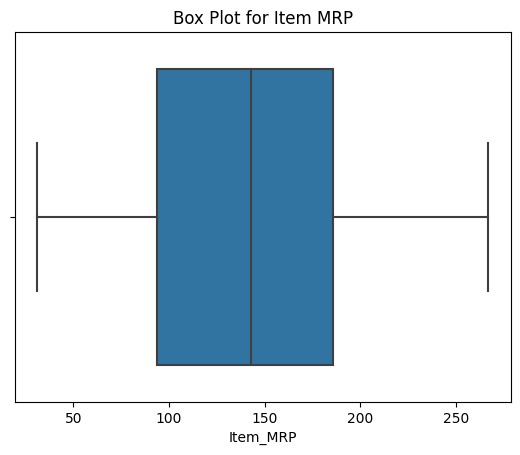

In [34]:
sns.boxplot(data=df,x='Item_MRP')
plt.title("Box Plot for Item MRP")
plt.show()

### Pie Chart for Outlet Type

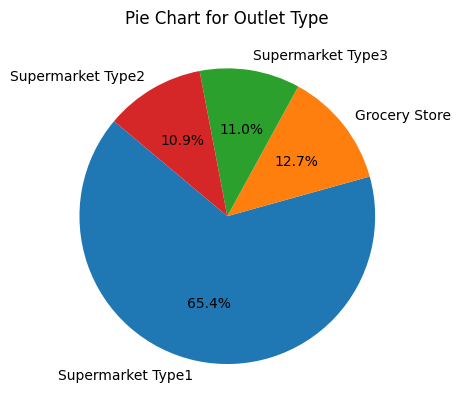

In [35]:
plt.pie(df['Outlet_Type'].value_counts(), labels=df['Outlet_Type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart for Outlet Type")
plt.show()

### Bar Chart for Outlet Size

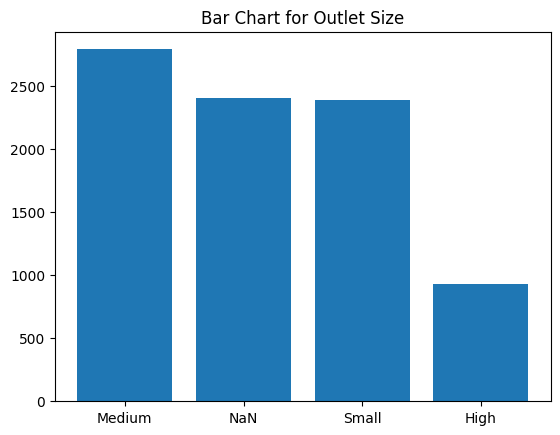

In [36]:
plt.bar(df['Outlet_Size'].value_counts().index, df['Outlet_Size'].value_counts())
plt.title("Bar Chart for Outlet Size")
plt.show()

### Violin Plot for Outlet_Location_Type vs. Item_Outlet_Sales

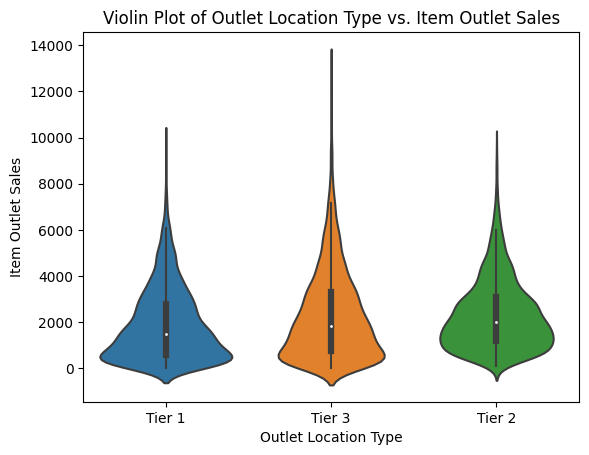

In [37]:
sns.violinplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.title('Violin Plot of Outlet Location Type vs. Item Outlet Sales')
plt.show()

### Stacked Bar Chart for Outlet_Location_Type and Outlet_Size

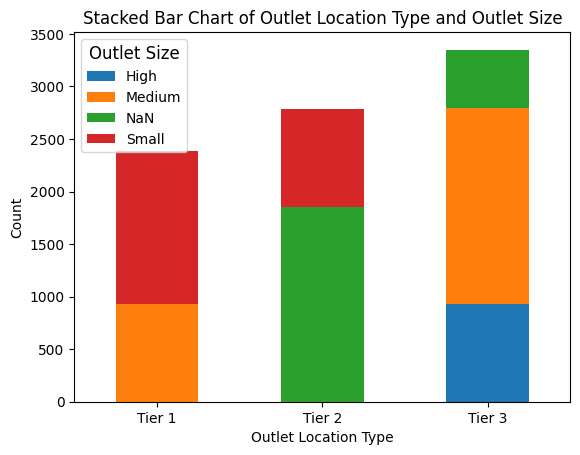

In [38]:
outlet_counts = df.groupby(['Outlet_Location_Type', 'Outlet_Size']).size().unstack()
outlet_counts.plot(kind='bar', stacked=True)
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Outlet Location Type and Outlet Size')
plt.xticks(rotation=0)
plt.legend(title='Outlet Size', title_fontsize='12', fontsize='10')

### Columns without object datatype

In [39]:
cols = []
for col in df.columns:
    if df[col].dtype != 'object':
        cols.append(col)

In [40]:
cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Item_Outlet_Sales',
 'Outlet_Age']

### Heat map of Independent Variable with Dependent Variable

Text(0.5, 1.0, 'Correlation in Features and Target Variable')

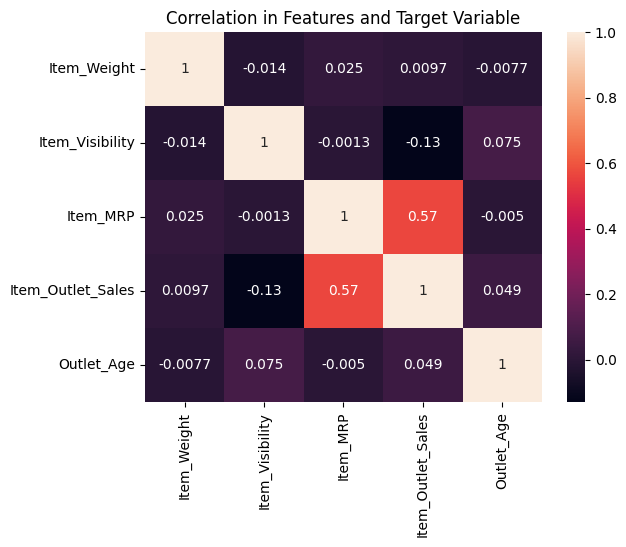

In [41]:
corr = df[cols].corr()
sns.heatmap(data=corr, annot=True)
plt.title('Correlation in Features and Target Variable')

### Columns without object datatype

In [42]:
obj = []
for col in df.columns:
    if df[col].dtype == 'object':
        obj.append(col)

### Performing One-Hot Encoding of categorical columns

In [43]:
ohe = pd.get_dummies(df[obj], drop_first=True).astype(int)

### Concatinating ohe with df columns without object datatype

In [44]:
df1 = pd.concat([ohe,df[cols]],axis=1)
df1.shape

(8523, 38)

In [45]:
df1.head()

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,9.30,0.016047,249.8092,3735.1380,24
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,5.92,0.019278,48.2692,443.4228,14
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,17.50,0.016760,141.6180,2097.2700,24
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,19.20,0.000000,182.0950,732.3800,25
4,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,8.93,0.000000,53.8614,994.7052,36


### Independent Variables

In [46]:
X = df1.drop('Item_Outlet_Sales',axis=1)
X

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,9.300,0.016047,249.8092,24
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,5.920,0.019278,48.2692,14
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,17.500,0.016760,141.6180,24
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,19.200,0.000000,182.0950,25
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,8.930,0.000000,53.8614,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,6.865,0.056783,214.5218,36
8519,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,8.380,0.046982,108.1570,21
8520,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1,0,0,10.600,0.035186,85.1224,19
8521,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,7.210,0.145221,103.1332,14


### Dependent Variable

In [47]:
y = df['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Splitting our data into training and testing data

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
5470,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,16.000,0.065329,78.4986,14
8431,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,19.700,0.053331,56.7930,21
3557,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,7.655,0.032010,117.2492,21
7918,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,15.200,0.033651,108.9912,24
4573,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,12.300,0.058106,60.4562,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,12.600,0.035863,58.3562,38
7291,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,7.520,0.044023,183.0950,26
1344,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,12.850,0.033173,172.0422,19
7293,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,13.800,0.024660,87.4172,25


In [49]:
X_train.shape

(6818, 37)

In [50]:
X_test.shape

(1705, 37)

### Performing Normalization

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5]

array([[ 1.35633703, -0.17650914, -0.11695411, -0.28853751,  3.39604008,
        -0.33121069, -0.41166524, -0.16135245, -0.25523728, -0.34945646,
        -0.22980508, -0.14319886, -0.08420275, -0.4053097 , -0.22980508,
        -0.12981947, -0.35314489, -0.34972064,  2.86158684, -0.25944886,
        -0.35340753, -0.347604  , -0.34892775, -0.34680837, -0.34786898,
         1.4319774 , -0.62836655, -0.62087902, -0.69438744,  1.23422691,
        -1.36730707,  2.86158684, -0.35340753,  0.75602406, -0.01818403,
        -0.99836828, -1.33558825],
       [-0.73727988, -0.17650914, -0.11695411, -0.28853751, -0.2944606 ,
        -0.33121069,  2.42915823, -0.16135245, -0.25523728, -0.34945646,
        -0.22980508, -0.14319886, -0.08420275, -0.4053097 , -0.22980508,
        -0.12981947, -0.35314489, -0.34972064, -0.34945646, -0.25944886,
        -0.35340753, -0.347604  ,  2.8659228 , -0.34680837, -0.34786898,
        -0.69833504,  1.59142781, -0.62087902,  1.44011822, -0.81022379,
         0.73136

### Training our model

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(loss='squared_error',learning_rate=0.1,criterion='squared_error',n_estimators=50)
reg.fit(X_train_scaled,y_train)
reg.score(X_test_scaled,y_test)

0.6108980131405604

### Correlation of Features with Target Variable

In [53]:
corr_y = df1.corr()
corr_y

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Fat_Content_Regular,1.000000,0.032643,0.065711,0.073235,0.021236,0.085041,0.116955,-0.118461,-0.188156,-0.255203,...,-0.003272,0.000241,0.000533,0.002129,0.000183,-0.021092,0.047314,0.006063,0.018719,-0.003151
Item_Type_Breads,0.032643,1.000000,-0.019918,-0.050010,-0.051373,-0.058204,-0.071605,-0.027955,-0.044402,-0.060225,...,0.002933,0.001909,-0.006189,-0.000734,0.007693,-0.050764,0.000416,-0.000112,0.002332,0.003631
Item_Type_Breakfast,0.065711,-0.019918,1.000000,-0.032828,-0.033723,-0.038207,-0.047004,-0.018351,-0.029147,-0.039533,...,-0.008741,0.003754,-0.008695,0.000077,-0.003550,-0.002092,0.043418,0.001460,-0.004656,0.006768
Item_Type_Canned,0.073235,-0.050010,-0.032828,1.000000,-0.084670,-0.095929,-0.118015,-0.046074,-0.073181,-0.099258,...,0.009366,-0.004612,0.001236,0.010418,0.001136,-0.031096,0.011114,-0.005666,0.007387,-0.010998
Item_Type_Dairy,0.021236,-0.051373,-0.033723,-0.084670,1.000000,-0.098544,-0.121232,-0.047330,-0.075176,-0.101965,...,-0.008162,-0.004482,0.003396,-0.001746,-0.010817,0.032942,0.035984,0.035551,0.008858,0.005286
Item_Type_Frozen Foods,0.085041,-0.058204,-0.038207,-0.095929,-0.098544,1.000000,-0.137352,-0.053624,-0.085173,-0.115523,...,-0.000590,-0.007556,0.009750,-0.001507,-0.006128,0.000837,-0.003153,-0.013358,-0.009482,-0.007690
Item_Type_Fruits and Vegetables,0.116955,-0.071605,-0.047004,-0.118015,-0.121232,-0.137352,1.000000,-0.065970,-0.104782,-0.142120,...,-0.002541,0.008032,-0.000811,0.000919,0.005173,0.029499,0.018969,0.023688,0.025950,0.005495
Item_Type_Hard Drinks,-0.118461,-0.027955,-0.018351,-0.046074,-0.047330,-0.053624,-0.065970,1.000000,-0.040908,-0.055485,...,0.003314,-0.000174,0.007837,-0.003132,-0.001143,-0.047052,-0.003700,-0.010089,-0.003956,-0.006627
Item_Type_Health and Hygiene,-0.188156,-0.044402,-0.029147,-0.073181,-0.075176,-0.085173,-0.104782,-0.040908,1.000000,-0.088129,...,-0.004093,0.011654,-0.005422,0.002174,0.004634,0.014173,-0.053931,-0.041646,-0.025587,0.002961
Item_Type_Household,-0.255203,-0.060225,-0.039533,-0.099258,-0.101965,-0.115523,-0.142120,-0.055485,-0.088129,1.000000,...,-0.001097,0.004917,0.001234,-0.004979,-0.001009,0.036079,-0.032230,0.046815,0.015701,0.001951


### Selecting Top 20 features

In [54]:
top_20_features = corr_y['Item_Outlet_Sales'].abs().sort_values(ascending=False)[:20]
top_20_features

Item_Outlet_Sales                  1.000000
Item_MRP                           0.567574
Outlet_Identifier_OUT027           0.311192
Outlet_Type_Supermarket Type3      0.311192
Outlet_Identifier_OUT019           0.277250
Outlet_Size_Medium                 0.204701
Outlet_Size_NaN                    0.131973
Item_Visibility                    0.128625
Outlet_Type_Supermarket Type1      0.108765
Outlet_Size_Small                  0.098403
Outlet_Location_Type_Tier 2        0.058261
Outlet_Identifier_OUT035           0.052823
Outlet_Age                         0.049135
Outlet_Location_Type_Tier 3        0.046376
Outlet_Type_Supermarket Type2      0.038059
Outlet_Identifier_OUT018           0.038059
Outlet_Identifier_OUT049           0.034264
Outlet_Identifier_OUT017           0.032610
Item_Type_Fruits and Vegetables    0.025950
Item_Type_Health and Hygiene       0.025587
Name: Item_Outlet_Sales, dtype: float64

In [55]:
df2 = df1[top_20_features.index]
df2

,Item_Outlet_Sales,Item_MRP,Outlet_Identifier_OUT027,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT019,Outlet_Size_Medium,Outlet_Size_NaN,Item_Visibility,Outlet_Type_Supermarket Type1,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Identifier_OUT035,Outlet_Age,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type2,Outlet_Identifier_OUT018,Outlet_Identifier_OUT049,Outlet_Identifier_OUT017,Item_Type_Fruits and Vegetables,Item_Type_Health and Hygiene
0,3735.1380,249.8092,0,0,0,1,0,0.016047,1,0,0,0,24,0,0,0,1,0,0,0
1,443.4228,48.2692,0,0,0,1,0,0.019278,0,0,0,0,14,1,1,1,0,0,0,0
2,2097.2700,141.6180,0,0,0,1,0,0.016760,1,0,0,0,24,0,0,0,1,0,0,0
3,732.3800,182.0950,0,0,0,0,1,0.000000,0,0,0,0,25,1,0,0,0,0,1,0
4,994.7052,53.8614,0,0,0,0,0,0.000000,1,0,0,0,36,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,2778.3834,214.5218,0,0,0,0,0,0.056783,1,0,0,0,36,1,0,0,0,0,0,0
8519,549.2850,108.1570,0,0,0,0,1,0.046982,1,0,1,0,21,0,0,0,0,0,0,0
8520,1193.1136,85.1224,0,0,0,0,0,0.035186,1,1,1,1,19,0,0,0,0,0,0,1
8521,1845.5976,103.1332,0,0,0,1,0,0.145221,0,0,0,0,14,1,1,1,0,0,0,0


### Independent Variable

In [56]:
X = df2.drop('Item_Outlet_Sales',axis=1)
X

,Item_MRP,Outlet_Identifier_OUT027,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT019,Outlet_Size_Medium,Outlet_Size_NaN,Item_Visibility,Outlet_Type_Supermarket Type1,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Identifier_OUT035,Outlet_Age,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type2,Outlet_Identifier_OUT018,Outlet_Identifier_OUT049,Outlet_Identifier_OUT017,Item_Type_Fruits and Vegetables,Item_Type_Health and Hygiene
0,249.8092,0,0,0,1,0,0.016047,1,0,0,0,24,0,0,0,1,0,0,0
1,48.2692,0,0,0,1,0,0.019278,0,0,0,0,14,1,1,1,0,0,0,0
2,141.6180,0,0,0,1,0,0.016760,1,0,0,0,24,0,0,0,1,0,0,0
3,182.0950,0,0,0,0,1,0.000000,0,0,0,0,25,1,0,0,0,0,1,0
4,53.8614,0,0,0,0,0,0.000000,1,0,0,0,36,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,214.5218,0,0,0,0,0,0.056783,1,0,0,0,36,1,0,0,0,0,0,0
8519,108.1570,0,0,0,0,1,0.046982,1,0,1,0,21,0,0,0,0,0,0,0
8520,85.1224,0,0,0,0,0,0.035186,1,1,1,1,19,0,0,0,0,0,0,1
8521,103.1332,0,0,0,1,0,0.145221,0,0,0,0,14,1,1,1,0,0,0,0


### Dependent Variable

In [57]:
y = df['Item_Outlet_Sales']

### Train Test Split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### Performing Normalization

In [59]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training and Evaluating our model

In [60]:
reg = GradientBoostingRegressor(loss='squared_error',learning_rate=0.1,criterion='squared_error',n_estimators=50)
reg.fit(X_train_scaled,y_train)
reg.score(X_test_scaled,y_test)

0.6094756282408847

### Selecting Top 10 features

In [61]:
top_10_features = corr_y['Item_Outlet_Sales'].abs().sort_values(ascending=False)[:10]
top_10_features

Item_Outlet_Sales                1.000000
Item_MRP                         0.567574
Outlet_Identifier_OUT027         0.311192
Outlet_Type_Supermarket Type3    0.311192
Outlet_Identifier_OUT019         0.277250
Outlet_Size_Medium               0.204701
Outlet_Size_NaN                  0.131973
Item_Visibility                  0.128625
Outlet_Type_Supermarket Type1    0.108765
Outlet_Size_Small                0.098403
Name: Item_Outlet_Sales, dtype: float64

In [62]:
df3 = df1[top_10_features.index]
df3

,Item_Outlet_Sales,Item_MRP,Outlet_Identifier_OUT027,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT019,Outlet_Size_Medium,Outlet_Size_NaN,Item_Visibility,Outlet_Type_Supermarket Type1,Outlet_Size_Small
0,3735.1380,249.8092,0,0,0,1,0,0.016047,1,0
1,443.4228,48.2692,0,0,0,1,0,0.019278,0,0
2,2097.2700,141.6180,0,0,0,1,0,0.016760,1,0
3,732.3800,182.0950,0,0,0,0,1,0.000000,0,0
4,994.7052,53.8614,0,0,0,0,0,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...
8518,2778.3834,214.5218,0,0,0,0,0,0.056783,1,0
8519,549.2850,108.1570,0,0,0,0,1,0.046982,1,0
8520,1193.1136,85.1224,0,0,0,0,0,0.035186,1,1
8521,1845.5976,103.1332,0,0,0,1,0,0.145221,0,0


### Independent Variable

In [63]:
X = df3.drop('Item_Outlet_Sales',axis=1)
X

,Item_MRP,Outlet_Identifier_OUT027,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT019,Outlet_Size_Medium,Outlet_Size_NaN,Item_Visibility,Outlet_Type_Supermarket Type1,Outlet_Size_Small
0,249.8092,0,0,0,1,0,0.016047,1,0
1,48.2692,0,0,0,1,0,0.019278,0,0
2,141.6180,0,0,0,1,0,0.016760,1,0
3,182.0950,0,0,0,0,1,0.000000,0,0
4,53.8614,0,0,0,0,0,0.000000,1,0
...,...,...,...,...,...,...,...,...,...
8518,214.5218,0,0,0,0,0,0.056783,1,0
8519,108.1570,0,0,0,0,1,0.046982,1,0
8520,85.1224,0,0,0,0,0,0.035186,1,1
8521,103.1332,0,0,0,1,0,0.145221,0,0


### Dependent Variable

In [64]:
y = df['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Train Test Split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### Performing Normalization

In [66]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training and Evaluating our model

In [67]:
reg = GradientBoostingRegressor(loss='squared_error',learning_rate=0.1,criterion='squared_error',n_estimators=50)
reg.fit(X_train_scaled,y_train)
reg.score(X_test_scaled,y_test)

0.6089737822868614

In [68]:
import pickle

### Saving our model

In [69]:
with open('model.pkl','wb') as f:
    pickle.dump(reg,f)

### Saving our scaler

In [70]:
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

### Coping test dataframe in test1

In [71]:
test1 = test.copy()

### Checking for null values in test dataset

In [72]:
test1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Filling null values of Column 'Item_Weight' with the median value of 'Item_Weight' column of train dataset

In [73]:
test1['Item_Weight'] = test1['Item_Weight'].fillna(df['Item_Weight'].median())
test1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Filling null values of Column 'Outlet_Size' with the 'NaN' value

In [74]:
test1['Outlet_Size'] = test1['Outlet_Size'].fillna('NaN')
test1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Columns with Object Datatype

In [75]:
cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Item_Outlet_Sales',
 'Outlet_Age']

### Dropped 'Item_Identifier' column

In [76]:
test1.drop('Item_Identifier',axis=1, inplace=True)

### Replacing 'LF' and 'low fat' with 'Low Fat' in 'Item_Fat_Content' column

In [77]:
test1['Item_Fat_Content'] = test1['Item_Fat_Content'].replace('LF','Low Fat')
test1['Item_Fat_Content'] = test1['Item_Fat_Content'].replace('low fat','Low Fat')
test1['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular'], dtype=object)

### Replacing 'reg' with 'Regular' in 'Item_Fat_Content' column

In [78]:
test1['Item_Fat_Content'] = test1['Item_Fat_Content'].replace('reg','Regular')
test1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Creating new column 'Outlet_Age'= 2023 - 'Outlet_Establishment_Year'

In [79]:
test1['Outlet_Age'] = 2023- test1['Outlet_Establishment_Year']
test1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,24
1,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,16
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,25
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,16
4,12.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,38


### Dropping 'Outlet_Establishment_Year' column

In [80]:
test1.drop('Outlet_Establishment_Year',axis=1, inplace=True)

In [81]:
obj

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

### Performing One-Hot Encoding for Test.csv file

In [82]:
ohe = pd.get_dummies(test1[obj], drop_first=True).astype(int)
ohe.head()

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_NaN,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


### Removing Target variable name from list of variables without object datatype

In [83]:
cols.remove('Item_Outlet_Sales')

In [84]:
cols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']

### Concatinating OHE data with remaining dataset

In [85]:
test2 = pd.concat([ohe,test1[cols]],axis=1)
test2.shape

(5681, 37)

In [86]:
ind_var = corr_y['Item_Outlet_Sales'].abs().sort_values(ascending=False)[:10].index.to_list()

In [87]:
ind_var.remove('Item_Outlet_Sales')

### List of independent variables

In [88]:
ind_var

['Item_MRP',
 'Outlet_Identifier_OUT027',
 'Outlet_Type_Supermarket Type3',
 'Outlet_Identifier_OUT019',
 'Outlet_Size_Medium',
 'Outlet_Size_NaN',
 'Item_Visibility',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Size_Small']

In [89]:
test3 = test2[ind_var]

### Performing Normalization

In [90]:
test3_scaled = scaler.transform(test3)
test3_scaled

array([[-0.52605066, -0.35340753, -0.35340753, ..., -1.13963809,
         0.73136461, -0.62087902],
       [-0.85647804, -0.35340753, -0.35340753, ..., -0.54045519,
         0.73136461, -0.62087902],
       [ 1.62761447, -0.35340753, -0.35340753, ...,  0.64668034,
        -1.36730707, -0.62087902],
       ...,
       [-0.35101538, -0.35340753, -0.35340753, ...,  0.14100668,
         0.73136461, -0.62087902],
       [ 1.19119245, -0.35340753, -0.35340753, ..., -1.28650468,
         0.73136461, -0.62087902],
       [-0.97749942, -0.35340753, -0.35340753, ...,  0.74657204,
         0.73136461, -0.62087902]])

### Predicting for test.csv file

In [91]:
test_predict = reg.predict(test3_scaled)

In [92]:
test_predict

array([1674.08511261, 1351.88576939,  988.87134114, ..., 1849.2667004 ,
       3441.10576811, 1351.88576939])

### Creating dataframe with predicted values

In [93]:
predict = pd.DataFrame(test_predict, columns=['Item_Outlet_Sales'])
predict.head()

,Item_Outlet_Sales
0,1674.085113
1,1351.885769
2,988.871341
3,2394.417309
4,5525.335676


### Concatinating test.csv with predicted values

In [94]:
predicted_output = pd.concat([test,predict],axis=1)
predicted_output.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1674.085113
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1351.885769
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,988.871341
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2394.417309
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5525.335676


### Saving Predicted values in predicted_output.csv file

In [95]:
predicted_output.to_csv('predicted_output.csv',index=False)